# A Rankine cycle analysis

Of all the thermodynamic engine cycles, arguably none has had so substantial impact on our society and culture as the Rankine cycle; though the Diesel and Otto cycles might have something to say about that. The Rankine cycle is sometimes known as the steam engine. In addition to driving the industrial revolution, fueling the rise of rail around the world, and powering the first ships that could "sail" into the wind, the Rankine cycle still provides most of the world's electricity in nuclear, coal, and even the back-end of combined-cycle gas turbine plants.<br><br>
The Rankine cycle usually uses water as its working fluid. Despite its unfortunate corrosive properties, water is quite remarkable for its high specific heat and latent heat of vaporization. The Rankine cycle uses four or five steps to separate four or five states:<br><br>
(1) a pump pressurizes liquid water from a low-pressure reservoir, <br>
(2) a boiler heats the liquid water to a boil, <br>
(2b) sometimes, a "super-heater" is added to continue heating the steam, <br>
(3) a turbine or piston expands the steam to produce work, and <br>
(4) a condenser cools the fluid back to a liquid before returning it to the reservoir. <br><br>
Here is an example analysis to calculate the mass flow of water needed to produce 100kW with a boiler at 250psi, and a super-heater. The super-heater heat is calculated so that the piston/turbine output is a saturated vapor.

# Rankine cycle analysis

C.R. Martin (c) 2016-2018 <br>
GPL v3.0 <br>
Enjoy!

A Rankine cycle is a closed loop usually using water as the working fluid. A low-pressure reservoir contains liquid.  The liquid is pumped into a high pressure boiler, where steam is generated. Optionally, the steam is further super-heated beyond its saturation temperature.  The steam is then passed through a turbine (or piston) where useful work is extracted.  Finally, waste heat is rejected and the remaining steam is condensed into liquid before being returned to the reservoir.

Given the high and low pressures, this code determines the processes so that the turbine exit (5) is precisely saturated steam.

In [1]:
import pyromat as pyro
import numpy as np
import matplotlib.pyplot as plt

Use different color codes to change the color of the plots

In [2]:
color = 'r'    # Red
#color = 'b'   # Blue

This is a True/False flag to deactivate the plot text

In [3]:
show_text = True

This is a True/False flag to allow over-plotting of previous results

In [4]:
clear_plots = False

Liquid water reservoir is at ambient pressure

In [5]:
p1 = 1.013

Operating pressure of the boiler

In [6]:
p2 = 18.3   # 18.3 bar is roughly 250 psig
#p2 = 11.4  # 11.4 bar is roughly 150 psig

How much work do we need?

In [7]:
Wnet = 100. # Let's make a 100kW engine

Get the steam data

In [8]:
steam = pyro.get('mp.H2O')

Assume the reservoir is a saturated liquid, as it would likely be coming out of the condenser.  In reality some supercooling is likely, but we will neglect it here. States (5) and (1) will straddle the dome

In [9]:
T1 = steam.Ts(p1)
p5=p1   # Since it is spanning the done, (5) and (1) share T and p
T5=T1
h1,h5 = steam.hs(T=T1)
s1,s5 = steam.ss(T=T1)
d1,d5 = steam.ds(T=T1)

Isentropic compression of liquid water. It is common to assume that T1=T2 since liquid is very close to incompressible.  To compare results, remove the comment from the second line below.

In [10]:
T2 = steam.T_s(p=p2,s=s1)
#T2 = T1
h2,s2,d2 = steam.hsd(T=T2,p=p2)

The boiler will span the dome <br>
s2s, h2s, and T2s are the points where the process enters the dome

In [11]:
T3 = steam.Ts(p=p2)
p3 = p2
p2s = p2
T2s = T3
s2s,s3 = steam.ss(T=T3) # these are faster with T and p
h2s,h3 = steam.hs(T=T3) # specified
d2s,d3 = steam.ds(T=T3)

The turbine is an isentropic expansion to the low pressure <br>
The superheater will end with the same entropy as s5

In [12]:
p4 = p3
T4 = steam.T_s(s=s5,p=p4)
h4,s4,d4 = steam.hsd(T=T4,p=p4)

State (5) is already determined

All the states are known, now. <br>
How much work did the feed water pump do? <br>
This might also be approximated as volume flow times pressure change.

In [13]:
w12 = -(h2-h1)

How much heat did the boiler add?

In [14]:
q23 = h3-h2

How much heat did the superheater add?

In [15]:
q34 = h4-h3

How much work did the turbine produce

In [16]:
w45 = -(h5-h4)

How much heat is rejected by the condenser?

In [17]:
q51 = h1-h5

calculate the net work per kg of water

In [18]:
wnet = w45 + w12

calculate the total heat addition

In [19]:
qh = q23 + q34

calculate the mass flow required to size the engine

In [20]:
mdot = Wnet/wnet

calculate the engine's efficiency

In [21]:
n = wnet/qh

heats

In [22]:
Qboil = q23 * mdot
Qsuper = q34 * mdot

## Generate some diagrams

Let figure 1 be a T-s diagram

Text(0.5, 1.0, 'Rankine Cycle T-s Diagram')

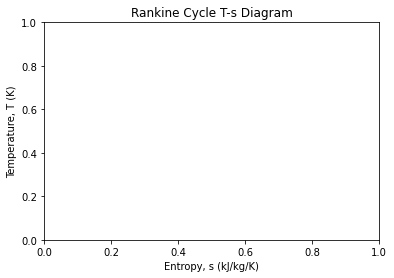

In [23]:
f1 = plt.figure(1)
if clear_plots:
    plt.clf()
ax1 = f1.add_subplot(111)
ax1.set_xlabel('Entropy, s (kJ/kg/K)')
ax1.set_ylabel('Temperature, T (K)')
ax1.set_title('Rankine Cycle T-s Diagram')

Let figure 2 be a P-v diagram

Text(0.5, 1.0, 'Rankine Cycle p-v Diagram')

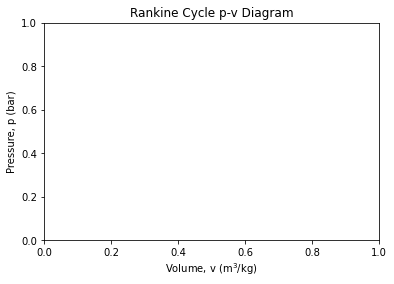

In [24]:
f2 = plt.figure(2)
if clear_plots:
    plt.clf()
ax2 = f2.add_subplot(111)
ax2.set_ylabel('Pressure, p (bar)')
ax2.set_xlabel('Volume, v (m$^3$/kg)')
ax2.set_title('Rankine Cycle p-v Diagram')

Generate the dome on both plots

In [25]:
Tt,pt = steam.triple()
Tc,pc = steam.critical()
T = np.arange(Tt,Tc,2.5)
p = steam.ps(T)
dL,dV = steam.ds(T=T)
sL,sV = steam.ss(T=T)
ax1.plot(sL,T,'k')
ax1.plot(sV,T,'k')
ax2.plot(1./dL,p,'k')
ax2.plot(1./dV,p,'k')

Process 1-2 (isentropic compression of a liquid)

In [26]:
p = np.array([p1,p2])
T = np.array([T1,T2])
d = np.array([d1,d2])
s = np.array([s1,s2])
ax1.plot(s,T,color,linewidth=1.5)
ax2.plot(1./d,p,color,linewidth=1.5)

Process 2-2s (constant-p heat until saturation)

In [27]:
T = np.linspace(T2,T2s,10)
p = p2 * np.ones(T.shape)
s = steam.s(T=T,p=p)
s[-1] = s2s # force the last points to be liquid - not vapor
d[-1] = d2s # force the last points to be liquid - not vapor
d = steam.d(T=T,p=p)
ax1.plot(s,T,color,linewidth=1.5)
ax2.plot(1./d,p,color,linewidth=1.5)

Process 2s-3 (constant-p boiling)

In [28]:
ax1.plot([s2s,s3],[T2s,T3],color,linewidth=1.5)
ax2.plot([1./d2s, 1./d3],[p2s,p3],color,linewidth=1.5)

Process 3-4 (constant-p superheating)

In [29]:
T = np.linspace(T3,T4,20)
p = p3*np.ones(T.shape)
s = steam.s(T=T,p=p)
d = steam.d(T=T,p=p)
s[0] = s3
d[0] = d3
ax1.plot(s,T,color,linewidth=1.5)
ax2.plot(1./d,p,color,linewidth=1.5)

process 4-5 (isentropic expansion)

In [30]:
ax1.plot([s4,s5],[T4,T5],color,linewidth=1.5)
ax2.plot([1./d4,1./d5],[p4,p5],color,linewidth=1.5)
#p = np.linspace(p4,p5,20)
#T = np.zeros(p.shape)
#for index in range(p.size):
#    T[index],_ = steam.psolve(p=p[index],s=s4)
#d = steam.d(T=T,p=p)
#s = steam.s(T=T,p=p)
#ax1.plot(s,T,'r',linewidth=1.5)
#ax2.plot(1./d,p,'r',linewidth=1.5)

process 5-1 (constant-p heat rejection) <br>
add the line across the dome

In [31]:
ax1.plot([s1,s5],[T1, T5],color,linewidth=1.5)
ax2.plot([1./d1,1./d5],[p1,p5],color,linewidth=1.5)

Add some labels

In [32]:
if show_text:
    ax1.text(s1-2.5,T1,
    """(1) 
T={0:.1f}K
s={1:.3f}kJ/kg/K
(2)
T={2:.1f}K
s={3:.3f}kJ/kg/K""".format(float(T1),float(s1),float(T2),float(s2)))
    ax1.text(s3-3,T3+20,
    """(3) 
T={0:.1f}K
s={1:.3f}kJ/kg/K""".format(float(T3),float(s3)))
    ax1.text(s4+.2,T4-100,
    """(4) 
T={0:.1f}K
s={1:.3f}kJ/kg/K""".format(float(T4),float(s4)))
    ax1.text(s5+.2,T5,
    """(5) 
T={0:.1f}K
s={1:.3f}kJ/kg/K""".format(float(T5),float(s5)))
    
    v = 1./d1
    ax2.text(v,p1/5.,
    """(1) 
p={0:.2f}bar
v={1:f}m$^3$/kg""".format(float(p1),float(v)))
    v = 1./d2
    ax2.text(v*1.5,p2*1.1,
    """(2) 
p={0:.2f}bar
v={1:f}m$^3$/kg""".format(float(p2),float(v)))
    v = 1./d3
    ax2.text(v,p3,
    """(3) 
p={0:.2f}bar
v={1:f}m$^3$/kg
(4)
p={2:.2f}bar
v={3:f}m$^3$/kg""".format(float(p3),float(v),float(p4),float(1./d4)))
    v = 1./d5
    ax2.text(v/5,p5/5,
    """(5) 
p={0:.2f}bar
v={1:f}m$^3$/kg""".format(float(p5),float(v)))
    
    ax1.text(-.5,575,"""$\dot{{m}}$ = {0:.3f}kg/s
$\eta$ = {1:.3f}
$\dot{{W}}_{{NET}}$ = {2:.0f}kW
$\dot{{Q}}_{{BOIL}}$ = {3:.1f}kW
$\dot{{Q}}_{{SUPER}}$ = {4:.1f}kW""".format(float(mdot),float(n),float(Wnet),float(Qboil),float(Qsuper)))

ax1.grid('on')
ax2.grid('on')
ax2.set_xscale('log')
ax2.set_yscale('log')

ax1.set_xlim([-2,10])
ax1.set_ylim([300,800])
# adjust the volume scale
ax2.set_xlim([5e-4, 10])
ax2.set_ylim([.01,1000.])

plt.show()
#plt.show(block=False)